## Interpolation

* Interpolation is a method of constructing new data points within the range of a discrete set of known data points. 
* It plays a crucial role in data analysis by helping to predict unknown values for any point within the given range.
* For example, bank has CDs for 1 year, 2 years, 5 years at different rate. What would be the most reasonable CD rate for 4 years?

### The problem

* Consider two arrays of numbers $X$ and $Y$. The array $X$ contains independent data points and $Y$ includes dependent data points $y_i, i=1,…,m$. 
* The goal is to find a function $\hat{y}(x)$ that passes exactly through the given points. This function is known as the interpolating function or simply the **interpolant.**

### Interpolation makes the following assumptions:

- The given data points are exact, meaning there are **no measurement errors.**
- The given data points are distinct $x$ locations, i.e., there is a **unique mapping** from $x$ to $y$.
- The independent variable values are ordered, i.e., $x_0 < x_1 < \ldots < x_N.$
- Apparently they can't be categorical values.

### The goal

* With the interpolant, we can estimate $y$ values at $x$ locations not given in the data. 
* When these $x$ locations are within the range of known data points (i.e., for $x\in[\min\{x_i\},\max\{x_i\}]$), this process is termed **interpolation**. 
* Conversely, when we seek new $y$ values at $x$ locations outside the data range, this is known as **extrapolation**.

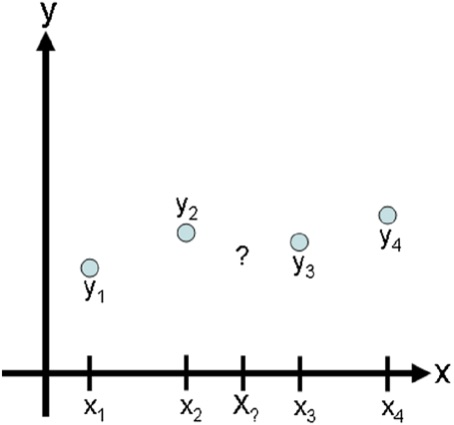

## Some main interpolations

- **Nearest Neighbour Interpolation**: 
    - A very basic form of interpolation to be aware of is the "nearest neighbour" approach. 
    - This is probably pretty much as it seems: fill in missing values with those nearest.
    - Some variations: forward filling, backward filling, etc

- **Linear Interpolation**: 
    - The simplest form of interpolation where a straight line is drawn between two points
    - the point of interest is estimated from this line.

- **Polynomial Interpolation**: 
    - A method that fits a polynomial of degree $n$ to a set of data points, allowing more complex curves to be fitted to the data.
    - High degree polynomial may get overfitting. -- curve may be too bumpy

- **Spline Interpolation**: An interpolation where small polynomials are fit to small sections of the data, making it particularly well-suited for large datasets.





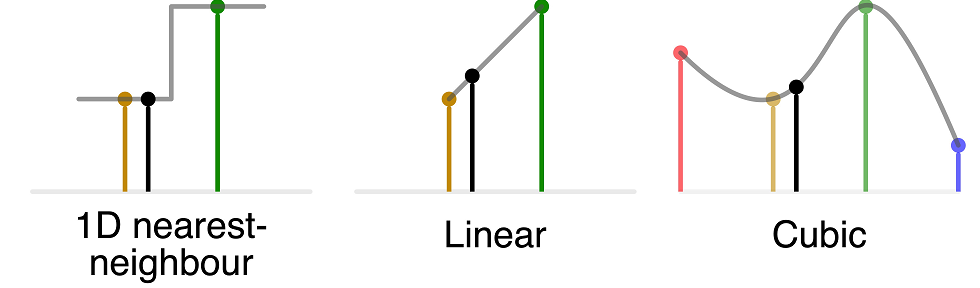

## Mathematical Formulation

* The specific mathematical formulation of interpolation depends on the method used, but the general aim is to find an **interpolating function $f(x)$ that passes through the given data points.**
* For instance, in linear interpolation, the interpolating function is a straight line, while in polynomial interpolation, it's a polynomial of degree $n$.

## Example

Consider a situation where you have the following data about the temperature of a place at different times:

| Time (hours) | Temperature (°C) |
|--------------|------------------|
| 9            | 20               |
| 10           | 22               |
| 11           | 26               |
| 12           | 28               |
| 13           | 30               |
| 14           | 31               |
| 15           | 31               |

Suppose you are interested in estimating the temperature at 10:30 AM, but you don't have that data available. You can estimate the temperature by performing different types of interpolation.

1. **Linear Interpolation**: This method will use the data points at 10 AM (22°C) and 11 AM (26°C) to estimate the temperature at 10:30 AM. The formula for linear interpolation is:
 
$$f(x) = f(a) + ((x - a) / (b - a)) * (f(b) - f(a))$$

Plugging the values in, we get:

$$f(10.5) = 22 + ((10.5 - 10) / (11 - 10)) * (26 - 22) = 24 °C$$

So, according to linear interpolation, the temperature at 10:30 AM would be 24°C.

2. **Spline Interpolation**: 
    - This method will consider all the data points and fit a smooth curve to estimate the temperature at 10:30 AM. 
    - The curve is designed to minimize the overall curvature of the line, which can provide a more accurate estimate when the underlying data follows a non-linear trend. 
    - Performing spline interpolation typically involves complex mathematical computations and is often done using a statistical software or programming language. 
    - Let's assume the software returned an estimate of 24.8°C.

### Notes

* Given that the temperature pattern is non-linear (with a peak at noon), the spline interpolation would likely give a more accurate estimate of the temperature at 10:30 AM. 
* This is because it takes into account the overall trend in the data, rather than just the immediate values at 10 AM and 11 AM. 
* Thus, in this case, spline interpolation would be a more appropriate method.

## Advantages

- Interpolation can be a very powerful tool when the data set is large and the underlying function is complex.
- It is straightforward to understand and can be implemented quite easily.

## Limitations

- Interpolation assumes the data is smooth between the known data points, which may not be the case.
- It doesn't perform well with extrapolation, i.e., estimating values outside the known range.
- It is sensitive to the choice of the interpolation method, as different methods can produce different results.

## How do I know my data is smooth?

- Plot the data points and see if they look like on one smooth curve.
- Does your data contain noise?
- Based on your domain knowledge of your data, check the below 
    - the delta change of the dependent variable should be small and incremental for small delta change of the independent variable.
    - In math, it means "differentiable" at any point.
    - It has **continuous derivatives up to some desired order over some domain** - Keep in mind then we will come back to it later.
- Examples:
    - Stock price over time is not smooth.
    - Temperature over time is smooth.
    - Population over time is smooth.
    - Interest rate of different terms is smooth.
    - Electrocardiogram is not smooth.
    - Seismic wave is not smooth.

### Examples that interpolation won't work. 

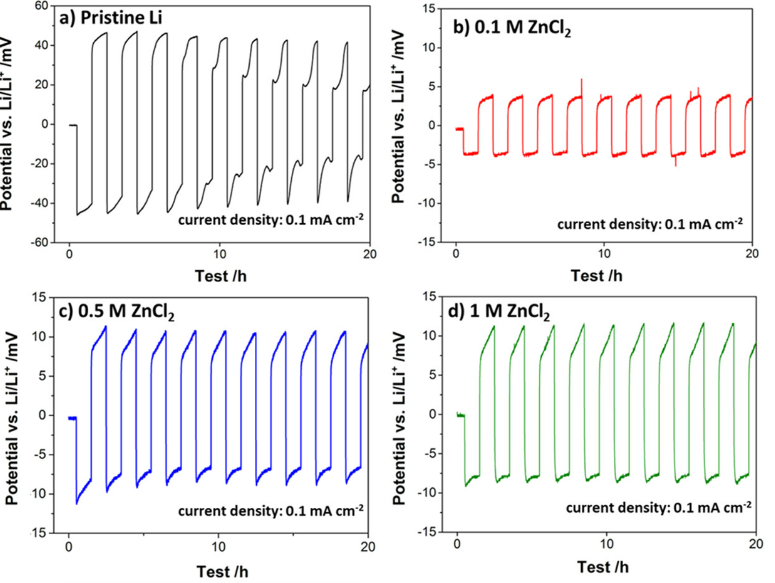

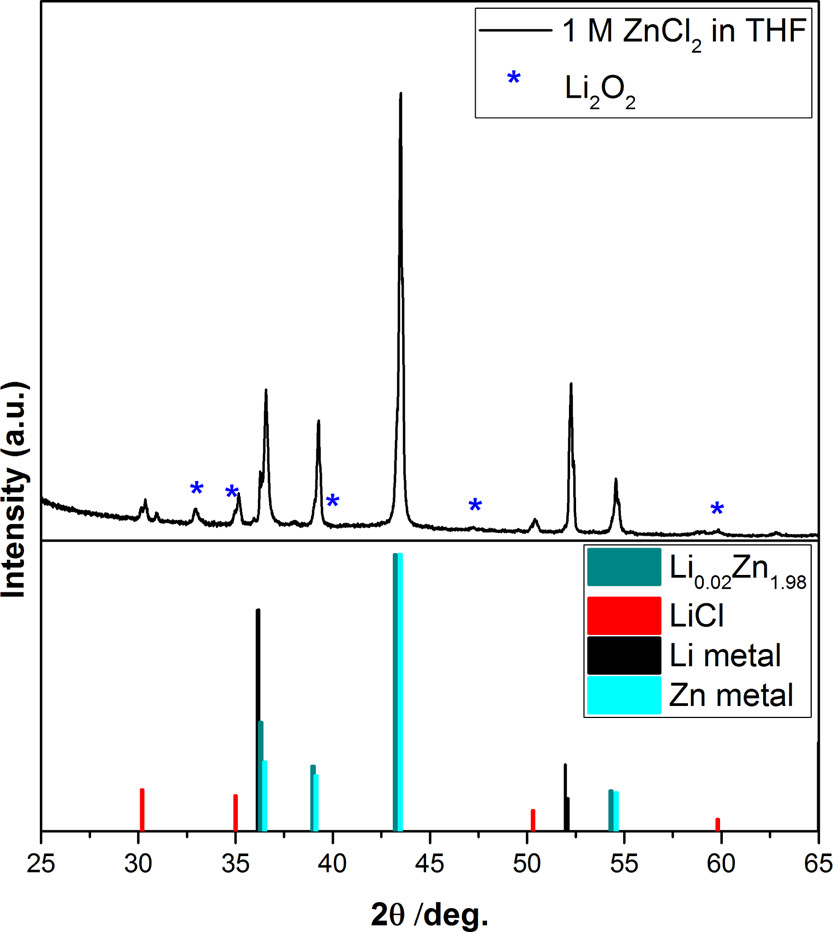

## 1D Nearest Neighbour Interpolation

* A very basic form of 1D interpolation to be aware of is the "nearest neighbour" approach.  
* This is probably pretty much as it seems: fill in missing values with those nearest. 

More mathematically, 

* let's say that we are given a set of n points $f_i(x_i), i=0,n-1$,
* assume that the unknown interpolated value at $f(x)$ is given by the value $f(x_i)$ to the point $x_i$ that minimizes $|x-x_i|$.  
* Basically, the computational cost of this approach comes down the cost of the sorting algorithm used. 
* If you are familar with KNN, it is exactly same when K=1

Let's look at an example below where we fully and then randomly subsample function $f(x) = x(1-x)\cos(4\pi x)$:

In [1]:
from IPython.display import HTML

import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as interp

from scipy.interpolate import interp1d

import random

from sympy import *

In [4]:
# . . Define a random function
def randfunc(x):
     return x*(1-x)*np.cos(4*np.pi*x)

# . . Define 1D grid and define the function over it
xx = np.linspace(0,np.pi,150,endpoint=True)
ff = randfunc(xx)

# . . Select npts random points from normal distribution, sort, and then grab the funcion values at that location
npts = 30;
points = np.sort(random.sample(list(set(xx)), npts))

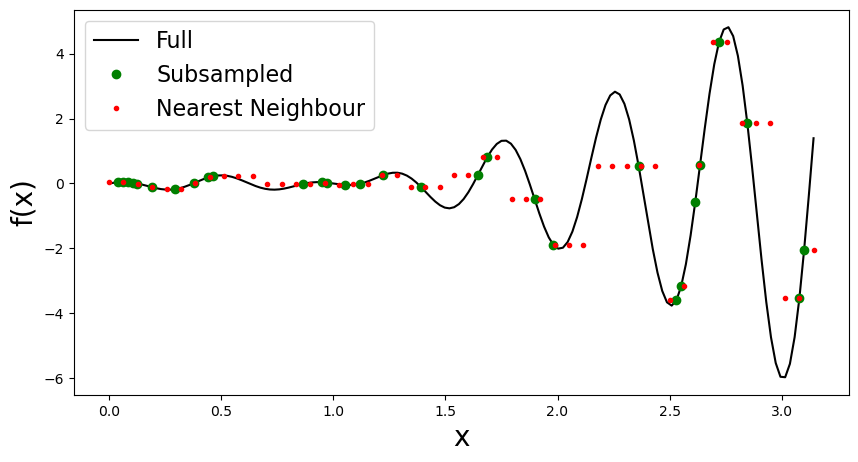

In [13]:
values = randfunc(points)

# . . Define nearest neighbour interpolation on random grid and then apply approximation to full grid
nn_interp = interp1d(points, values, kind='nearest',fill_value="extrapolate")
# np.interp
x = np.linspace(0,np.pi,50,endpoint=True)
nn_interpolated = nn_interp(x)

# . . Plotting 
plt.figure(figsize=(10,5))
plt.plot(xx,ff,'k') ## . .  the original function
plt.plot(points, values,'go') ## . . Randomly subsampled function
plt.plot(x,nn_interpolated,'r.') ## . . Nearest neighbour approximation
plt.legend(['Full','Subsampled','Nearest Neighbour'],fontsize=16)
plt.xlabel('x',fontsize=20)
plt.ylabel('f(x)',fontsize=20)
plt.show()

### Notes

* While this naive approach has clearly infilled the missing data points and somewhat takes the shape of the function it clearly yields some pretty low quality results.   
* Overall, this approach gives fairly low accuracy results, but can be a quick and dirty solution for very large data sets or where the solution is a slowly varying function (relative to the exising spatial sampling).
* So this interpolation works better when $x < 1.5$ but works worse for $x > 1.5$

## Linear Interpolation

* Linear interpolation is a simple yet effective technique used in curve fitting to approximate a value between two known data points. 
* This method is based on the assumption that the function between the two points is linear, making it a quick and easy method of approximation.
* Mathematically, if the two points are close enough, the curve between them can be approximated as a straight line.
* Which implies that linear interpolation works better when the sample points are closer each other
* that's why we must find the two adjacent points - the closest two points surrounding your input x value, for the best approximation. 

### Key Concepts

- Linear interpolation is based on the assumption that the function is linear between two points.
- This method is both simple and quick, although its accuracy may be compromised for complex functions or larger intervals.

### Mathematical Formulation

Given two data points $(x_i, y_i)$ and $(x_{i+1}, y_{i+1})$, the linear interpolation of a value $y$ at a point $x$ can be estimated using the following formula:

$$
y = y_i + \frac{(y_{i+1} - y_i) (x - x_i)}{x_{i+1} - x_i}
$$

### Derivation
 
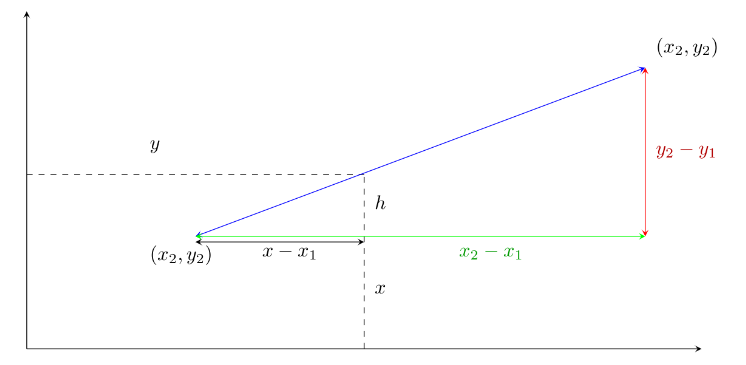

We can derive the formula for linear interpolation as follows:

1. Calculate the slope ($\alpha$) of the line between the two points: 

$$
\alpha = \frac{y_{i+1} - y_i}{x_{i+1} - x_i}
$$

2. Multiply the slope by the difference between the desired x value and the first x value to get $h$:

$$
h = \alpha \cdot (x - x_i)
$$

3. Add $h$ to the initial y value to get the interpolated y value:

$$
y = y_i + h
$$

This can be written as:

$$
y = y_i + (x - x_i) \cdot \frac{y_{i+1} - y_i}{x_{i+1} - x_i}
$$

This equation is the formula for linear interpolation.

### Algorithm Steps

Implementing linear interpolation involves the following steps:

1. Identify the two points $(x_i, y_i)$ and $(x_{i+1}, y_{i+1})$ between which you want to interpolate.
2. Apply the linear interpolation formula to estimate the value of the function at the desired point $x$.

### Example

Suppose we have the points A(-2, 0) and B (2, 2). Let's try to estimate the value of the function at $x=1$.

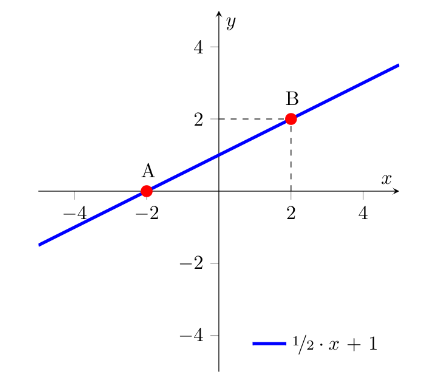

1. Identify the points between which we want to interpolate, in this case $(-2, 0)$ and $(2, 2)$.
2. Apply the linear interpolation formula:

$$
\hat{y}(x) = y_i + \frac{(y_{i+1} - y_{i})(x - x_{i})}{(x_{i+1} - x_{i})} = 0 + \frac{(2 - 0)(1 - (-2))}{(2 - (-2))} = 1.5
$$

## Linear Interpolation in Python

**Q:** You have a $f(x) = \sin x$ function sampled at the following $(x,f(x))$ locations: $(0,0)$, $(\pi/4,1/\sqrt{2})$ and $(\pi/2,1)$. What are the values of the function at $x_a=\pi/8$ and $x_b=3\pi/8$ at the given control points?

**A:** We can use equation 2 with $n=1$ to write

$$p_1(x) = L_0(x)f_0 + L_1(x) f_1 = \left(\frac{x-x_1}{x_0-x_1}\right) f_0+\left(\frac{x-x_0}{x_1-x_0}\right) f_1  $$

Using $x_0=0$ and $x_1=\pi/4$, we can calculate the approximate value of the function at $x_a=\pi/8$ via:

$$p_1(\pi/8) = \left(\frac{x-x_1}{x_0-x_1}\right) f_0+\left(\frac{x-x_0}{x_1-x_0}\right) f_1 = \left(\frac{\pi/8-\pi/4}{0-\pi/4}\right) 0 + \left(\frac{\pi/8-0}{\pi/4-0}\right) \frac{1}{\sqrt{2}}=\frac{1}{2\sqrt{2}}. $$

Now using $x_0=\pi/4$ and $x_1=\pi/2$, we can calculate the approximate value of the function at $x_b=3\pi/8$ via:

$$p_1(3\pi/8) = \left(\frac{x-x_1}{x_0-x_1}\right) f_0+\left(\frac{x-x_0}{x_1-x_0}\right) f_1 = \left( \frac{3\pi/8-\pi/2}{\pi/4-\pi/2}\right) \frac{1}{\sqrt{2}}+\left(\frac{3\pi/8-\pi/4}{\pi/2-\pi/4}\right) 1 = \frac{1}{2}\left(1+\frac{1}{\sqrt{2}}\right). $$

Let's look at these plotted in the function below.  The black line and stars show the true $f(x) = \sin x$ function and the three control points, respectively.  The red line shows the linear Lagrange interpolating function, while the red stars show the approximations at $x_a=\pi/8$ and $x_b=3\pi/8$. 



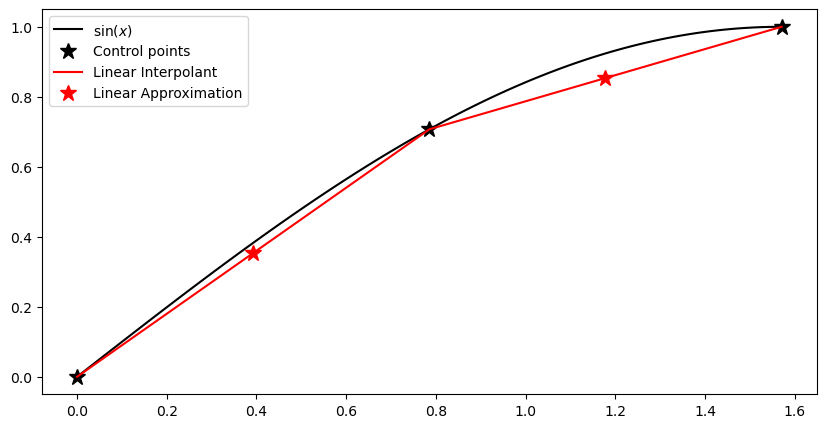

In [19]:
from IPython.display import HTML

import numpy as np
import matplotlib.pyplot as plt


import random

from sympy import *
# . . Create true function f(x) using sympy
x = symbols('x')
equation = sin(x)

# . . Create three critical points
criticalpointsX=list((0,np.pi/4,np.pi/2))
criticalpointsY=[equation.subs(x,a) for a in criticalpointsX]

# . . Bring to discrete world
xx = np.linspace(0,np.pi/2,100)
yy = lambdify(x,equation)(xx)

# . . Plot 
plt.figure(figsize=(10,5))
plt.plot(xx,np.transpose(yy),'k')
plt.plot(criticalpointsX,criticalpointsY,'k*',markersize=12)
plt.plot([0,np.pi/4,np.pi/2],[0,1/(np.sqrt(2)),1],'r-',markersize=12)
plt.plot([np.pi/8,3*np.pi/8],[1/(2*np.sqrt(2)),0.5*(1+1/(np.sqrt(2)))],'r*',markersize=12)
plt.legend(['$\sin(x)$','Control points','Linear Interpolant','Linear Approximation'])
plt.show()

### The linear interpolation will be more accurate if there are more points to interpolate. Try to change the `num` to a bigger value

In [81]:
criticalpointsX=np.linspace(0.0, np.pi/2, num=10)
criticalpointsY = [equation.subs(x,a) for a in criticalpointsX]

print(list(criticalpointsX), list(criticalpointsY))

[0.0, 0.17453292519943295, 0.3490658503988659, 0.5235987755982988, 0.6981317007977318, 0.8726646259971648, 1.0471975511965976, 1.2217304763960306, 1.3962634015954636, 1.5707963267948966] [0, 0.173648177666930, 0.342020143325669, 0.500000000000000, 0.642787609686539, 0.766044443118978, 0.866025403784439, 0.939692620785908, 0.984807753012208, 1.00000000000000]


In [85]:
xnew = np.linspace(0.0, np.pi/2, num=100)
ynew = np.interp(np.array(xnew,dtype=float), np.array(criticalpointsX, dtype=float), np.array(criticalpointsY, dtype=float))
print(xnew)
print(ynew)

[0.         0.01586663 0.03173326 0.04759989 0.06346652 0.07933315
 0.09519978 0.11106641 0.12693304 0.14279967 0.1586663  0.17453293
 0.19039955 0.20626618 0.22213281 0.23799944 0.25386607 0.2697327
 0.28559933 0.30146596 0.31733259 0.33319922 0.34906585 0.36493248
 0.38079911 0.39666574 0.41253237 0.428399   0.44426563 0.46013226
 0.47599889 0.49186552 0.50773215 0.52359878 0.53946541 0.55533203
 0.57119866 0.58706529 0.60293192 0.61879855 0.63466518 0.65053181
 0.66639844 0.68226507 0.6981317  0.71399833 0.72986496 0.74573159
 0.76159822 0.77746485 0.79333148 0.80919811 0.82506474 0.84093137
 0.856798   0.87266463 0.88853126 0.90439789 0.92026451 0.93613114
 0.95199777 0.9678644  0.98373103 0.99959766 1.01546429 1.03133092
 1.04719755 1.06306418 1.07893081 1.09479744 1.11066407 1.1265307
 1.14239733 1.15826396 1.17413059 1.18999722 1.20586385 1.22173048
 1.23759711 1.25346374 1.26933037 1.28519699 1.30106362 1.31693025
 1.33279688 1.34866351 1.36453014 1.38039677 1.3962634  1.412130

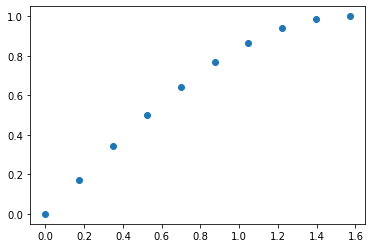

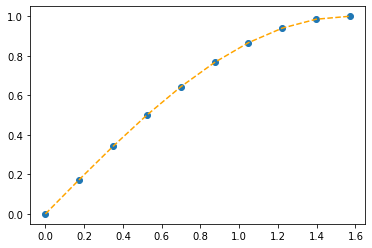

In [83]:
plt.scatter(criticalpointsX, criticalpointsY)
plt.show()
plt.scatter(criticalpointsX, criticalpointsY)
plt.plot(xnew, ynew, color='orange',linestyle='--')
plt.show()

### Another example

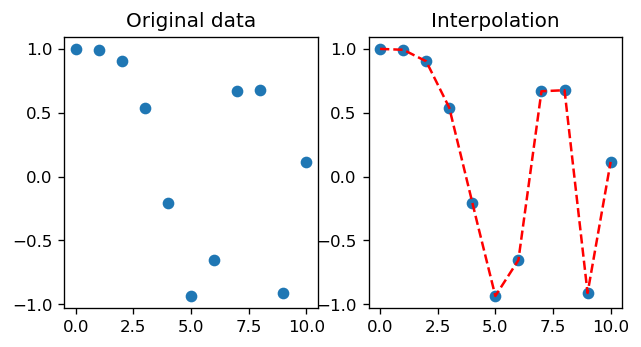

In [87]:
x = np.linspace(0, 10, num=11)
y = np.cos(-x**2 / 9.0)

xnew = np.linspace(0, 10, num=1001)
ynew = np.interp(xnew, x, y)

fig, ax  = plt.subplots(1,2,figsize=(6,3),dpi=120)
ax[0].scatter(x, y)
ax[0].set_title("Original data")
ax[1].scatter(x, y)
ax[1].plot(xnew, ynew, color='red',linestyle='--')
ax[1].set_title("Interpolation")
plt.show()

### Advantages

- The method is straightforward and quick to apply.
- It's practical when the data is nearly linear or when a quick approximation is required.
- One practical example: save an interest rate curve into database. We actually save many descrete data points in database, and interpolate to fill the gap on the fly when necessary.

### Limitations

- The accuracy of the method diminishes as the function becomes more non-linear.
- It doesn't account for any known derivatives at the data points, which can limit its accuracy.

## Cubic Spline

* Cubic spline interpolation is a refined mathematical tool frequently used within numerical analysis. 
* It's an approximation technique that employs piecewise cubic polynomials, collectively forming a cubic spline. 
* These cubic polynomials are specifically engineered to pass through a defined set of data points, hence striking **a balance between overly simple (like linear) and overly intricate (like high-degree polynomial) interpolations.**

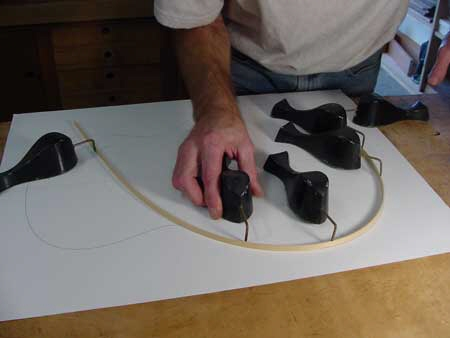
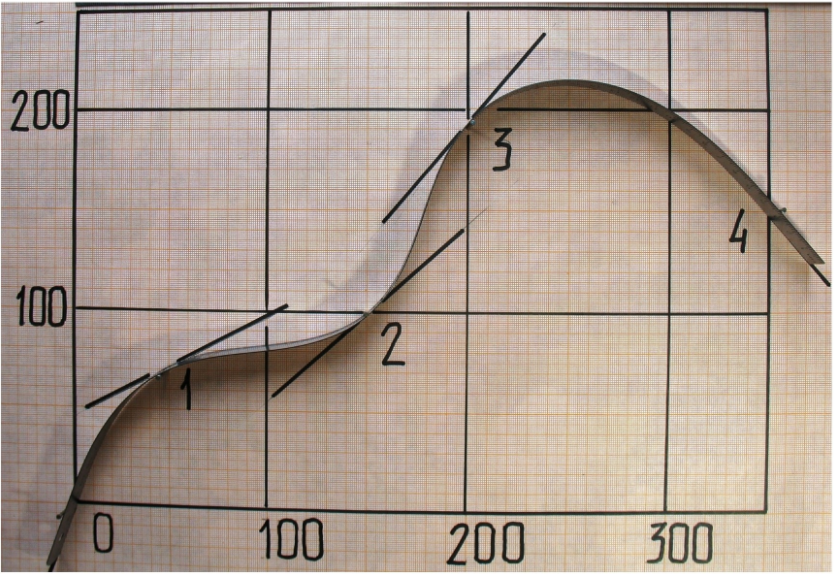

## Mathematical Formulation

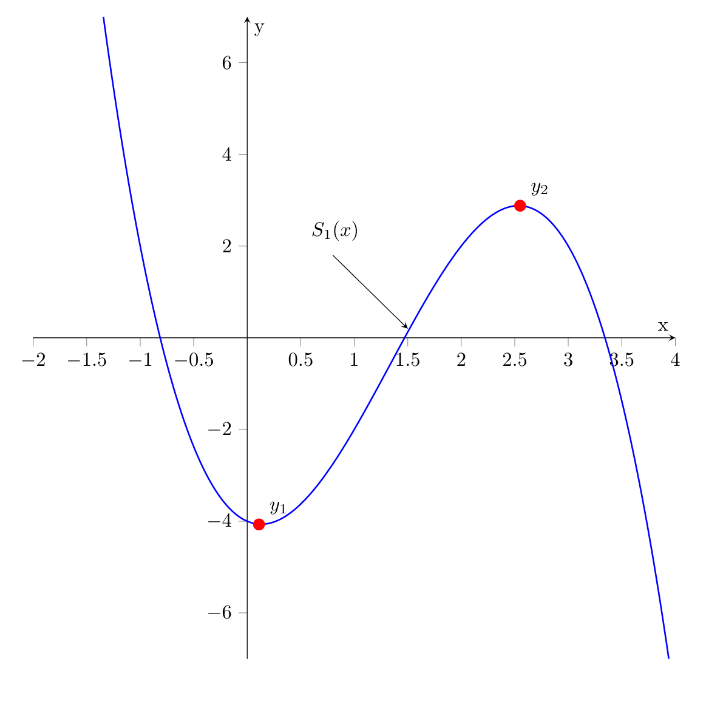

A cubic spline function S(x) is applied in cubic spline interpolation across an interval $[x_i, x_{i+1}]$. The function is represented as:

$$
S_i(x) = a_i + b_i(x - x_i) + c_i(x - x_i)^2 + d_i(x - x_i)^3
$$

Here, the variables $a_i$, $b_i$, $c_i$, and $d_i$ are the coefficients that we need to determine, while $x_i$ and $x_{i+1}$ are the control points.

The goal of cubic spline interpolation is to find these coefficients that make the spline pass smoothly through each point and ensure that the first and second derivatives are continuous across the entire function.

### Conditions for Cubic Spline Interpolation

1. Each cubic polynomial $S_i(x)$ should pass through the data points in its interval. That is:

$$
S_i(x_i) = y_i \quad and \quad S_i(x_{i+1}) = y_{i+1}
$$

2. The spline function S(x) should be continuous. This means that the polynomials $S_i(x)$ and $S_{i+1}(x)$ should meet at $x_{i+1}$:

$$
S_i(x_{i+1}) = S_{i+1}(x_{i+1})
$$

3. The first and second derivatives of S(x) should be continuous. This leads to:

$$
S_i'(x_{i+1}) = S_{i+1}'(x_{i+1}) \quad \text{and} \quad S_i''(x_{i+1}) = S_{i+1}''(x_{i+1})
$$

4. At the ends, the second derivatives are usually set to zero (natural cubic spline):

$$
S_0''(x_0) = S_{n-1}''(x_n) = 0
$$

With these conditions, we can form a system of equations to find the constants $a_i$, $b_i$, $c_i$, and $d_i$. Solving this system gives us the coefficients of the cubic spline interpolating function.

In Python, we can use scipy's function CubicSpline to perform cubic spline interpolation. Note that the above constraints are not the same as the ones used by scipy's CubicSpline as default for performing cubic splines, there are different ways to add the final two constraints in scipy by setting the bc_type argument (see the help for CubicSpline to learn more about this).

In [20]:
from scipy.interpolate import CubicSpline
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

C:\Users\damin\AppData\Local\Temp\ipykernel_9596\3963957643.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


In [21]:
x = [0, 1, 2]
y = [1, 3, 2]

# use bc_type = 'natural' adds the constraints as we described above
f = CubicSpline(x, y, bc_type='natural')
x_new = np.linspace(0, 2, 100)
y_new = f(x_new)

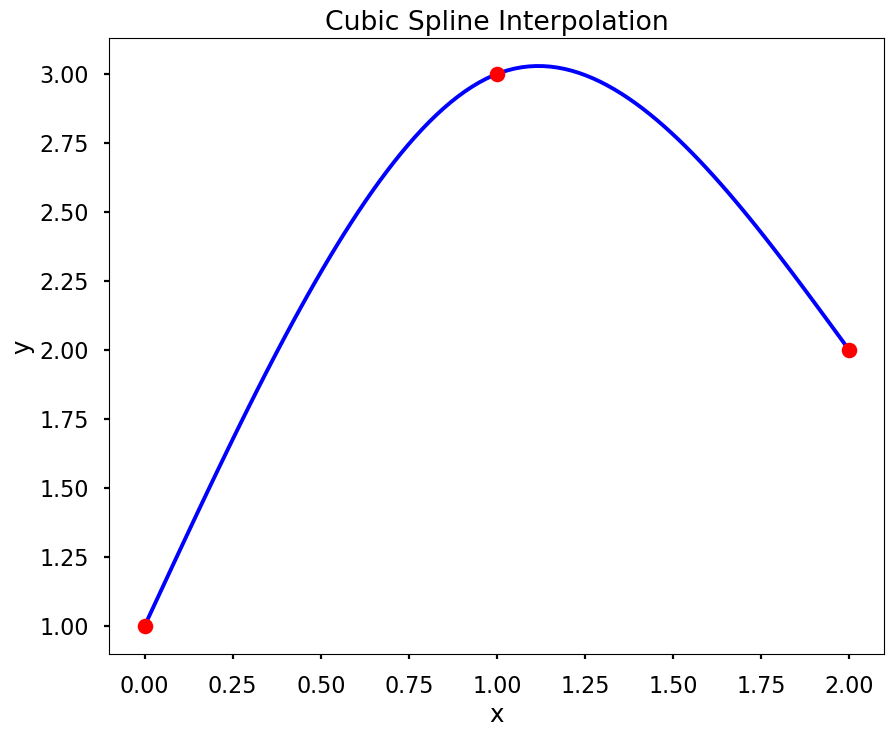

In [22]:
plt.figure(figsize = (10,8))
plt.plot(x_new, y_new, 'b')
plt.plot(x, y, 'ro')
plt.title('Cubic Spline Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

To determine the coefficients of each cubic function, we write out the constraints explicitly as a system of linear equations with $4(n-1)$ unknowns. For $n$ data points, the unknowns are the coefficients $a_i, b_i, c_i, d_i$ of the cubic spline, $S_i$ joining the points $x_i$ and $x_{i+1}$.

For the constraints $S_i(x_i) = y_i$ we have:
$$
\begin{array}{rrrrr}
a_1 x_1^3 + & b_1 x_1^2 +  & c_1 x_1 +  & d_1 = &y_1,\\ 
a_2 x_2^3 + & b_2 x_2^2 +  & c_2 x_2 +  & d_2 = &y_2,\\ 
\cdots\\ 
a_{n-1} x_{n-1}^3 + &b_{n-1} x_{n-1}^2 + &c_{n-1} x_{n-1} +& d_{n-1} =& y_{n-1}.
\end{array}
$$

For the constraints $S_i(x_{i+1}) = y_{i+1}$ we have:
$$
\begin{array}{rrrrr}
a_1 x_2^3 +&b_1 x_2^2 +&c_1 x_2 +&d_1 =& y_2,\\ 
a_2 x_3^3 +&b_2 x_3^2 +&c_2 x_3 +&d_2 =& y_3,\\
&&\cdots\\
a_{n-1} x_{n}^3 +&b_{n-1} x_{n}^2 +&c_{n-1} x_{n} +&d_{n-1} =& y_{n}.
\end{array}
$$

For the constraints $S^{\prime}_i(x_{i+1}) = S^{\prime}_{i+1}(x_{i+1})$ we have:
$$
\begin{array}{rrrrrr}
3a_1 x_2^2 +&2b_1 x_2 +&c_1 - &3a_2 x_2^2 - &2b_2 x_2 - &c_2 =0,\\ 
3a_2 x_3^2 +&2b_2 x_3 +&c_2 -& 3a_3 x_3^2 -& 2b_3 x_3 -& c_3 =0,\\ 
&&&\cdots&&,\\
3a_{n-2} x_{n-1}^2 +&2b_{n-2} x_{n-1} +&c_{n-2} -& 3a_{n-1} x_{n-1}^2 -& 2b_{n-1} x_{n-1} -& c_{n-1} =0.
\end{array}
$$

For the constraints $S''_i(x_{i+1}) = S''_{i+1}(x_{i+1})$ we have:

$$
\begin{array}{rrrrrr}
6a_1 x_2 +& 2b_1 -& 6a_2 x_2 -& 2b_2 =& 0,\\
6a_2 x_3 +& 2b_2 -& 6a_3 x_3 -& 2b_3 =& 0,\\
+&&\ldots -& \\
6a_{n-2} x_{n-1} +& 2b_{n-2} -& 6a_{n-1} x_{n-1} -& 2b_{n-1} =& 0.
\end{array}
$$

Finally for the endpoint constraints $S''_1(x_1) = 0$ and $S''_{n-1}(x_n) = 0$, we have:
$$
\begin{array}{rr}
6a_1 x_1 +& 2b_1 = 0,\\
6a_{n-1} x_n +&2b_{n-1} = 0.
\end{array}
$$

These equations are linear in the unknown coefficients $a_i, b_i, c_i$, and $d_i$. We can put them in matrix form and solve for the coefficients of each spline by left division. Remember that whenever we solve the matrix equation $Ax = b$ for $x$, we must make be sure that $A$ is square and invertible. In the case of finding cubic spline equations, the $A$ matrix is always square and invertible as long as the $x_i$ values in the data set are unique.

**TRY IT!** Find the cubic spline interpolation at *x = 1.5* based on the data *x = [0, 1, 2]*, *y = [1, 3, 2]*.

First we create the appropriate system of equations and find the coefficients of the cubic splines by solving the system in matrix form.}

The matrix form of the system of equations is:
$$
\left[\begin{array}{llllllll}
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 1 & 1 & 1 & 1\\
1 & 1 & 1 & 1 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 8 & 4 & 2 & 1\\
3 & 2 & 1 & 0 & -3 & -2 & -1 & 0\\
6 & 2 & 0 & 0 & -6 & -2 & 0 & 0\\
0 & 2 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 12 & 2 & 0 & 0
\end{array}\right]
\left[\begin{array}{c}
a_1 \\
b_1 \\
c_1 \\
d_1 \\
a_2 \\
b_2 \\
c_2 \\
d_2
\end{array}\right] =
\left[\begin{array}{c}
1 \\
3 \\
3 \\
2 \\
0 \\
0 \\
0 \\
0 \end{array}\right]
$$

In [4]:
b = np.array([1, 3, 3, 2, 0, 0, 0, 0])
b = b[:, np.newaxis]
A = np.array([[0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 1, 1, 1], [1, 1, 1, 1, 0, 0, 0, 0], \
             [0, 0, 0, 0, 8, 4, 2, 1], [3, 2, 1, 0, -3, -2, -1, 0], [6, 2, 0, 0, -6, -2, 0, 0],\
             [0, 2, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 12, 2, 0, 0]])

In [5]:
np.dot(np.linalg.inv(A), b)

array([[-0.75],
       [ 0.  ],
       [ 2.75],
       [ 1.  ],
       [ 0.75],
       [-4.5 ],
       [ 7.25],
       [-0.5 ]])

Therefore, the two cubic polynomials are

\begin{eqnarray*}
S_1(x) &=& -.75x^3 + 2.75x + 1, \quad  for \quad 0 \le x \le 1\ and\\
S_2(x) &=& .75x^3 - 4.5x^2 + 7.25x - .5, \quad  for  \quad 1 \le x \le 2
\end{eqnarray*}

So for $x = 1.5$ we evaluate $S_2(1.5)$ and get an estimated value of 2.7813.

## Compare linear and cubic interpolations

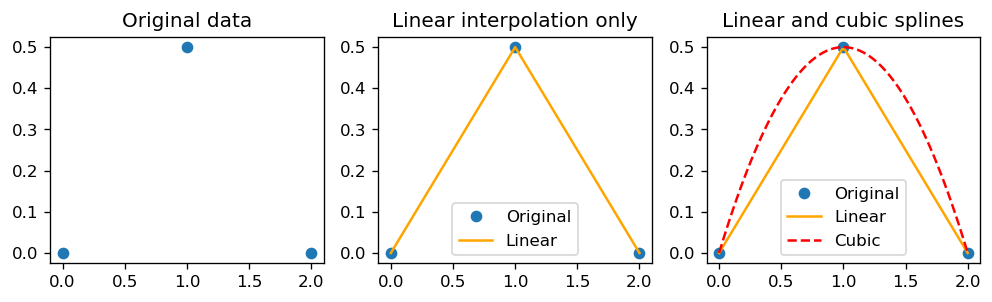

In [98]:
from scipy.interpolate import CubicSpline

x=np.array([0, 1, 2])
y=np.array([0, 0.5, 0])
linear_interpolation=lambda xnew: np.interp(xnew, x, y)

spl=CubicSpline(x, y)

xnew = np.linspace(0, 2, num=100)

fig, ax  = plt.subplots(1,3,figsize=(10,2.5),dpi=120)

ax[0].scatter(x,y)
ax[0].set_title("Original data")

ax[1].plot(x, y, 'o')
ax[1].plot(x, linear_interpolation(x), color='orange',linestyle='-')
ax[1].legend(['Original','Linear'])
ax[1].set_title("Linear interpolation only")


ax[2].plot(x, y, 'o')
ax[2].plot(xnew, linear_interpolation(xnew), color='orange',linestyle='-')
ax[2].plot(xnew, spl(xnew), color='red',linestyle='--')
ax[2].legend(['Original','Linear','Cubic'])
ax[2].set_title("Linear and cubic splines")
plt.show()

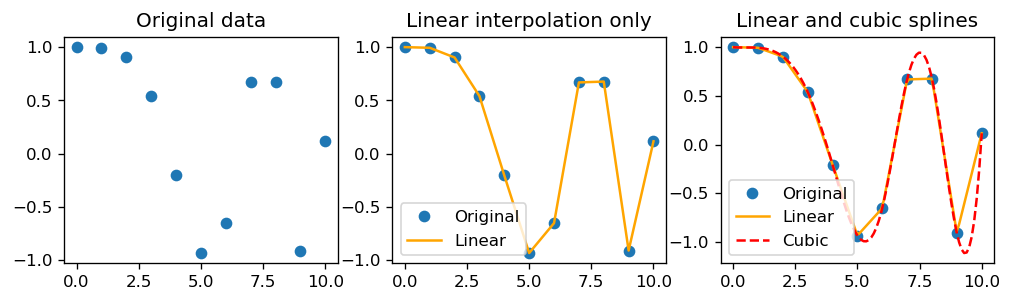

In [106]:
x = np.linspace(0, 10, num=11)
y = np.cos(-x**2 / 9.0)

# x = np.linspace(0, 10, num=NUM_DATA, endpoint=True)
# y = 0.1*x**3+0.25*x**2-7*x+11+ x*np.random.normal(size=11)

xnew = np.linspace(0, 10, num=100)

linear_interpolation=lambda xnew: np.interp(xnew, x, y)

spl=CubicSpline(x, y)

fig, ax  = plt.subplots(1,3,figsize=(10,2.5),dpi=120)

ax[0].scatter(x,y)
ax[0].set_title("Original data")

ax[1].plot(x, y, 'o')
ax[1].plot(x, linear_interpolation(x), color='orange',linestyle='-')
ax[1].legend(['Original','Linear'])
ax[1].set_title("Linear interpolation only")


ax[2].plot(x, y, 'o')
ax[2].plot(xnew, linear_interpolation(xnew), color='orange',linestyle='-')
ax[2].plot(xnew, spl(xnew), color='red',linestyle='--')
ax[2].legend(['Original','Linear','Cubic'])
ax[2].set_title("Linear and cubic splines")
plt.show()

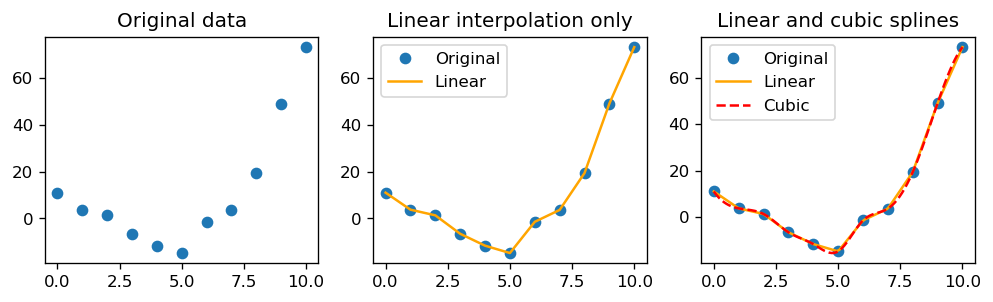

In [107]:
x = np.linspace(0, 10, num=NUM_DATA, endpoint=True)
y = 0.1*x**3+0.25*x**2-7*x+11+ x*np.random.normal(size=11)

xnew = np.linspace(0, 10, num=100)

linear_interpolation=lambda xnew: np.interp(xnew, x, y)

spl=CubicSpline(x, y)

fig, ax  = plt.subplots(1,3,figsize=(10,2.5),dpi=120)

ax[0].scatter(x,y)
ax[0].set_title("Original data")

ax[1].plot(x, y, 'o')
ax[1].plot(x, linear_interpolation(x), color='orange',linestyle='-')
ax[1].legend(['Original','Linear'])
ax[1].set_title("Linear interpolation only")


ax[2].plot(x, y, 'o')
ax[2].plot(xnew, linear_interpolation(xnew), color='orange',linestyle='-')
ax[2].plot(xnew, spl(xnew), color='red',linestyle='--')
ax[2].legend(['Original','Linear','Cubic'])
ax[2].set_title("Linear and cubic splines")
plt.show()

## Advantages 

- Cubic spline interpolation produces smoother and more flexible curves than most other methods.
- It's immune to oscillatory artifacts that high-degree polynomial interpolation may suffer from.

## Limitations

- It can be computationally intense compared to more straightforward methods.
- It requires the resolution of a system of equations, which can become complex with a large number of control points.

## Interpolation and curve-fitting are different

In [108]:
# x = np.linspace(0, 10, num=NUM_DATA, endpoint=True)
# y = 0.1*x**3+0.25*x**2-7*x+11+ x*np.random.normal(size=11)

x = np.linspace(0, 10, num=11)
y = np.cos(-x**2 / 9.0)

In [109]:
f1 = lambda xnew: np.interp(xnew, x, y)

from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a*x**2+b*x+c
def fitted_func(x):
    a1,b1,c1 = popt
    return a1*x**2+b1*x+c1

popt, _ = curve_fit(func, x, y)

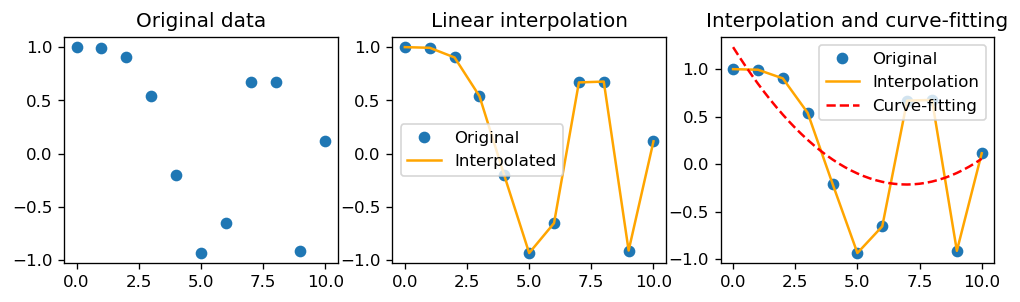

In [110]:
xnew = np.linspace(0, 10, num=41, endpoint=True)
fig, ax  = plt.subplots(1,3,figsize=(10,2.5),dpi=120)

ax[0].scatter(x,y)
ax[0].set_title("Original data")
ax[1].plot(x, y, 'o')
ax[1].plot(xnew, f1(xnew), color='orange',linestyle='-')
ax[1].legend(['Original','Interpolated'])
ax[1].set_title("Linear interpolation")
ax[2].plot(x, y, 'o')
ax[2].plot(xnew, f1(xnew), color='orange',linestyle='-')
ax[2].plot(xnew, fitted_func(xnew), color='red',linestyle='--')
ax[2].legend(['Original','Interpolation','Curve-fitting'])
ax[2].set_title("Interpolation and curve-fitting")
plt.show()

## Lab exercise of today: Interpolate Daily Treasury Par Yield Curve Rates

https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_yield_curve&field_tdr_date_value=2023

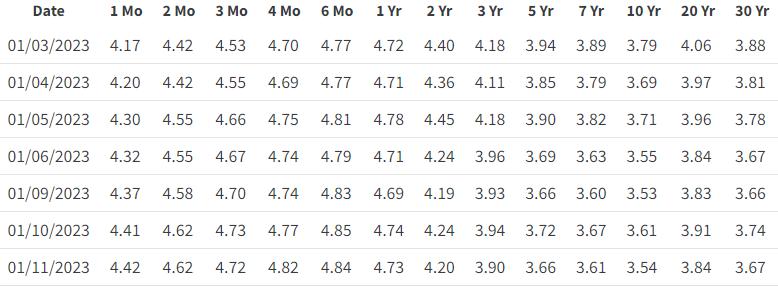

What would be the 8 Yr rate for Jan 3rd? Using the three methods in today's class.


## Homework

In the above table, you may notice that the rates on Jan 7 and Jan 8 are missing, because the two days are weekends.

1. Can you find the 8 Yr rates for the two days using interpolation techniques? Use three methods of today.

2. If any number in the table changes, would it change your result? Please try and give your conclusion and explanation. 

3. If you use a bigger or smaller table than my screenshot, would it change your result? Please try and give your conclusion and explanation. 
